In [12]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import RandomUnderSampler

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features)

In [13]:
data = container.Container(sample=pd.read_pickle("data/sample.pkl"))
data["balanced"] = pd.concat((
    data.sample[data.sample.nbg == 1].sample(786),
    data.sample[data.sample.nbg == 0]))
data["small_sample"] = pd.read_pickle("data/small_sample.pkl")

## Features cleaning

In [14]:
sclasses = {
    "nbg": 1,
    "no-nbg": 0}
sclasses

{'nbg': 1, 'no-nbg': 0}

In [15]:
data.sample.shape, data.balanced.shape, data.small_sample.shape

((12598, 161), (1572, 161), (4352, 161))

In [25]:
X_columns = clean_features(data, "sample")
X_columns = X_columns[
    ~(X_columns.str.contains("Freq2_") | X_columns.str.contains("Freq3_") | X_columns.str.contains("_cnt"))]
print("Total features:", X_columns.size)

Removing [] because null
Removing ['src1_Freq1_harmonics_rel_phase_0', 'src1_Freq2_harmonics_rel_phase_0', 'src1_Freq3_harmonics_rel_phase_0', 'src2_Freq1_harmonics_rel_phase_0', 'src2_Freq2_harmonics_rel_phase_0', 'src2_Freq3_harmonics_rel_phase_0'] because lowvariance
('Total features:', 112)


In [26]:
set(x.split("_", 1)[-1] for x in X_columns)

{'Amplitude',
 'AmplitudeH',
 'AmplitudeJ',
 'AmplitudeJH',
 'AmplitudeJK',
 'Autocor_length',
 'Beyond1Std',
 'CAR_mean',
 'CAR_sigma',
 'CAR_tau',
 'Con',
 'Eta_e',
 'FluxPercentileRatioMid20',
 'FluxPercentileRatioMid35',
 'FluxPercentileRatioMid50',
 'FluxPercentileRatioMid65',
 'FluxPercentileRatioMid80',
 'Freq1_harmonics_amplitude_0',
 'Freq1_harmonics_amplitude_1',
 'Freq1_harmonics_amplitude_2',
 'Freq1_harmonics_amplitude_3',
 'Freq1_harmonics_rel_phase_1',
 'Freq1_harmonics_rel_phase_2',
 'Freq1_harmonics_rel_phase_3',
 'Gskew',
 'LinearTrend',
 'MaxSlope',
 'Mean',
 'Meanvariance',
 'MedianAbsDev',
 'MedianBRP',
 'PairSlopeTrend',
 'PercentAmplitude',
 'PercentDifferenceFluxPercentile',
 'PeriodLS',
 'Period_fit',
 'Psi_CS',
 'Psi_eta',
 'Q31',
 'Rcs',
 'Skew',
 'SmallKurtosis',
 'Std',
 'c89_c3',
 'c89_hk_color',
 'c89_jh_color',
 'c89_jk_color',
 'c89_m2',
 'c89_m4',
 'n09_c3',
 'n09_hk_color',
 'n09_jh_color',
 'n09_jk_color',
 'n09_m2',
 'n09_m4',
 'ppmb'}

## SVM - Linear

In [27]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=RandomUnderSampler(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[NNhDLvKaVWic6tkDvRqn2g-2018-10-16 17:17:20.541432] Launching
[9K4ghniJ8bsuo9QAX3kyEb-2018-10-16 17:17:20.720144] Launching
[uQyGTorDrmPaco487sg6zG-2018-10-16 17:17:20.892469] Launching
[DubdBSyBK7MGmCFgVDoVRm-2018-10-16 17:17:21.059948] Launching
[o3TsSMJhbrBEPHxeBh27rY-2018-10-16 17:17:21.229399] Launching
[uFrw52PNapqwYMSNQ4am74-2018-10-16 17:17:21.393346] Launching
[6BvENLNdsUVaX58BP4MJiQ-2018-10-16 17:17:21.580118] Launching
[UrPtFyXnoMo95FMdZpZ4Vo-2018-10-16 17:17:21.762175] Launching
[A4QRV4fEm3t3JA74AUFAYj-2018-10-16 17:17:21.928633] Launching
[suprRyfS5ks5tEeGc3JvVn-2018-10-16 17:17:22.108225] Launching
[uQyGTorDrmPaco487sg6zG-2018-10-16 17:17:23.041747] Done
[NNhDLvKaVWic6tkDvRqn2g-2018-10-16 17:17:23.056194] Done
[DubdBSyBK7MGmCFgVDoVRm-2018-10-16 17:17:23.078277] Done
[9K4ghniJ8bsuo9QAX3kyEb-2018-10-16 17:17:23.157522] Done
[6BvENLNdsUVaX58BP4MJiQ-2018-10-16 17:17:23.299934] Done
[A4QRV4fEm3t3JA74AUFAYj-2018-10-16 17:17:23.454207] Done
[o3TsSMJhbrBEPHxeBh27rY-2018-10-16 17:

## SVM - Poly

In [28]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=RandomUnderSampler(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[NGBi2dzKGTNsyKj25m8R7N-2018-10-16 17:17:26.296673] Launching
[UPpTY34dBQAAsfEKzryNU9-2018-10-16 17:17:26.471493] Launching
[x2o2VygYM9UJV55UJfupjV-2018-10-16 17:17:26.632136] Launching
[NGBi2dzKGTNsyKj25m8R7N-2018-10-16 17:17:26.756182] Done
[JiT4LnvkDsbq4iQoaA4vnB-2018-10-16 17:17:26.791554] Launching
[UPpTY34dBQAAsfEKzryNU9-2018-10-16 17:17:26.935227] Done
[gKVW4Pa45hVBNmHZvJ6QqL-2018-10-16 17:17:26.964568] Launching
[x2o2VygYM9UJV55UJfupjV-2018-10-16 17:17:27.081334] Done
[Q97cwMjD8Jy3SoFKr8ZjLg-2018-10-16 17:17:27.121601] Launching
[JiT4LnvkDsbq4iQoaA4vnB-2018-10-16 17:17:27.235001] Done
[KFQzF9vMiM7NVeTcEM9Ybf-2018-10-16 17:17:27.274479] Launching
[gKVW4Pa45hVBNmHZvJ6QqL-2018-10-16 17:17:27.395936] Done
[5GWBCLiNSJB4UN3Jt58R59-2018-10-16 17:17:27.432051] Launching
[Q97cwMjD8Jy3SoFKr8ZjLg-2018-10-16 17:17:27.569956] Done
[xf7pVACjkMTLNE7RHszVgT-2018-10-16 17:17:27.603174] Launching
[KFQzF9vMiM7NVeTcEM9Ybf-2018-10-16 17:17:27.728369] Done
[dUW3qjoDyan755cTRos59S-2018-10-16 17:17:27

## Random Forest

In [29]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, sampler=RandomUnderSampler(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[4Yo9sM7NNaGQwtma3PuQV3-2018-10-16 17:17:29.848439] Launching
[caJdqNn9zQKcQqN3qtJsWi-2018-10-16 17:17:29.982081] Launching
[qFCDTyvkoKVs5dphkohr8d-2018-10-16 17:17:30.131124] Launching
[wjmQKSZvXcg6oU3BSkPeVL-2018-10-16 17:17:30.280466] Launching
[ENFKWPWUniagQwAWiG7XXh-2018-10-16 17:17:30.423686] Launching
[CZ3WSD5tKi5ArVSA9kqs9E-2018-10-16 17:17:30.575632] Launching
[NmfHYryATst7z956HRhcog-2018-10-16 17:17:30.728785] Launching
[W28E3TTeFxw8zc4uoJuuBN-2018-10-16 17:17:30.871732] Launching
[hy2qS6T2Fk9hJUGBhj5cZK-2018-10-16 17:17:31.023750] Launching
[SxYeS3aYGjqMHP5fV4xCb5-2018-10-16 17:17:31.177398] Launching
[4Yo9sM7NNaGQwtma3PuQV3-2018-10-16 17:17:37.348541] Done
[caJdqNn9zQKcQqN3qtJsWi-2018-10-16 17:17:37.894622] Done
[qFCDTyvkoKVs5dphkohr8d-2018-10-16 17:17:37.946732] Done
[wjmQKSZvXcg6oU3BSkPeVL-2018-10-16 17:17:38.157982] Done
[CZ3WSD5tKi5ArVSA9kqs9E-2018-10-16 17:17:38.318806] Done
[ENFKWPWUniagQwAWiG7XXh-2018-10-16 17:17:38.404981] Done
[W28E3TTeFxw8zc4uoJuuBN-2018-10-16 17:

## KNN

In [30]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, sampler=RandomUnderSampler(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[5tWkuv7jHdHX5CcAj5QpdC-2018-10-16 17:17:40.511534] Launching
[kitJSWrVVXSPZpPTZQtk2T-2018-10-16 17:17:40.657655] Launching
[5tWkuv7jHdHX5CcAj5QpdC-2018-10-16 17:17:40.768719] Done
[rNCZgyivHwbti9V4hTmUcM-2018-10-16 17:17:40.809357] Launching
[kitJSWrVVXSPZpPTZQtk2T-2018-10-16 17:17:40.890741] Done
[nDAw9Na2TqSXazjcHTsK2U-2018-10-16 17:17:40.966101] Launching
[rNCZgyivHwbti9V4hTmUcM-2018-10-16 17:17:41.044215] Done
[sJjdZEhC3JjCoHMwJzFsLB-2018-10-16 17:17:41.110027] Launching
[nDAw9Na2TqSXazjcHTsK2U-2018-10-16 17:17:41.228923] Done
[VUC4aNtzPQU8xv9VueqDB4-2018-10-16 17:17:41.257065] Launching
[sJjdZEhC3JjCoHMwJzFsLB-2018-10-16 17:17:41.340026] Done
[ZFTCqxdQMrEASxz5XkEZ2G-2018-10-16 17:17:41.429136] Launching
[VUC4aNtzPQU8xv9VueqDB4-2018-10-16 17:17:41.493217] Done
[6fre8Mhe37Xxa4UVCd8AsL-2018-10-16 17:17:41.593119] Launching
[ZFTCqxdQMrEASxz5XkEZ2G-2018-10-16 17:17:41.679978] Done
[H2fAtbXMhu93CPhBytprU7-2018-10-16 17:17:41.771078] Launching
[6fre8Mhe37Xxa4UVCd8AsL-2018-10-16 17:17:41

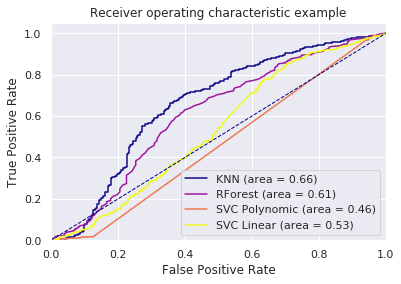

In [31]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})